# <span style="color:#33a2ff" ><strong> Hypothesis Tests </strong></span>

In [19]:
!pip install matplotlib
!pip install seaborn
!pip install spicy
!pip install squarify
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import squarify

In [20]:
#configurar estilo de visualizaciones 
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (6, 4)
%matplotlib inline

In [21]:
df = pd.read_csv('data\\clean_anime.csv')
df.head()

,anime_id,anime_url,image_url,name,english_name,japanese_names,score,genres,themes,synopsis,...,source,rating,rank,popularity,favorites,scored_by,members,premiered_season,premiered_year,duration_in_min_and_secs
0,52991,https://myanimelist.net/anime/52991/Sousou_no_...,https://cdn.myanimelist.net/images/anime/1015/...,Sousou no Frieren,Frieren: Beyond Journey's End,葬送のフリーレン,9.31,"Adventure, Drama, Fantasy",unknown,During their decade-long quest to defeat the D...,...,Manga,PG-13 - Teens 13 or older,1.0,160,63387,605478,1038347,fall,2023.0,24:00
1,5114,https://myanimelist.net/anime/5114/Fullmetal_A...,https://cdn.myanimelist.net/images/anime/1208/...,Fullmetal Alchemist: Brotherhood,Fullmetal Alchemist: Brotherhood,鋼の錬金術師 FULLMETAL ALCHEMIST,9.10,"Action, Adventure, Drama, Fantasy",Military,After a horrific alchemy experiment goes wrong...,...,Manga,R - 17+ (violence & profanity),2.0,3,232007,2196965,3484360,spring,2009.0,24:00
2,9253,https://myanimelist.net/anime/9253/Steins_Gate,https://cdn.myanimelist.net/images/anime/1935/...,Steins;Gate,Steins;Gate,STEINS;GATE,9.07,"Drama, Sci-Fi, Suspense","Psychological, Time Travel",Eccentric scientist Rintarou Okabe has a never...,...,Visual novel,PG-13 - Teens 13 or older,3.0,14,194580,1450481,2669303,spring,2011.0,24:00
3,60022,https://myanimelist.net/anime/60022/One_Piece_...,https://cdn.myanimelist.net/images/anime/1455/...,One Piece Fan Letter,One Piece Fan Letter,ONE PIECE FAN LETTER,9.06,"Action, Adventure, Fantasy",unknown,Although the golden age of piracy is about to ...,...,Light novel,PG-13 - Teens 13 or older,4.0,2334,1976,69555,92128,unknown,NaN,24:00
4,38524,https://myanimelist.net/anime/38524/Shingeki_n...,https://cdn.myanimelist.net/images/anime/1517/...,Shingeki no Kyojin Season 3 Part 2,Attack on Titan Season 3 Part 2,進撃の巨人 Season3 Part.2,9.05,"Action, Drama, Suspense","Gore, Military, Survival",Seeking to restore humanity's diminishing hope...,...,Manga,R - 17+ (violence & profanity),5.0,21,60535,1671960,2409440,spring,2019.0,23:00


# <span style="color:#33a2ff"> Hypothesis 1: Number of anime consumers is higher for anime released after 2000 than for anime released before or in 2000. </span>

Null Hypothesis (H₀): The average number of members for anime released before or in 2000 is the same as or greater than the average number of members for anime released after 2000. (μ₁ ≥ μ₂)

Alternative Hypothesis (H₁): The average number of members for anime released after 2000 is greater than the average number of members for anime released before or in 2000. (μ₁ < μ₂)

Alternative Hypothesis (H2): The average number of members for anime released before 2000 is greater than the average number of members for anime released after 2000. (μ₁ > μ₂)
Where:

- μ₁ = Population mean of "Number of Members" for anime released before or in 2000.

- μ₂ = Population mean of "Number of Members" for anime released after 2000.

In [22]:
df['premiered_year'] = pd.to_numeric(df['premiered_year'], errors='coerce')  # Convierte y pone NaN en errores
df = df.dropna(subset=['premiered_year'])  # Elimina filas con NaN en el año
df['premiered_year'] = df['premiered_year'].astype(int)  # Ahora convierte a entero
df = df[df['premiered_year'] > 1900]  # Discard year 1900 and before
df = df[df['premiered_year'] != 2025]  # Discard year 2025, since it's got only 3 months of data
My1 = df[df['premiered_year'].astype(int) <= 2000].groupby('premiered_year')['members'].mean().dropna()
My2 = df[df['premiered_year'].astype(int) > 2000].groupby('premiered_year')['members'].mean().dropna()
print(f"Number of otakus before/in 2000: {My1.mean()}")
print(f"Number of otakus after 2000: {My2.mean()}")
if My1.mean() == My2.mean():
    print("Null Hypothesis (H₀) scenario. Mean of the members is the same")
elif My1.mean() > My2.mean():
    print("Alternative Hypothesis (H₁) scenario. Mean of the members is greater before 2000")
elif My1.mean() < My2.mean():
    print("Alternative Hypothesis (H2) scenario. Mean of the members is greater after 2000")


Number of otakus before/in 2000: 20561.761478337387
Number of otakus after 2000: 199582.19318336467
Alternative Hypothesis (H2) scenario. Mean of the members is greater after 2000


# <div style="color:#33a2ff; font-size:36px"> Spearman Correlation Test </div>

Spearman correlation test is used to determine the strength and direction of the monotonic relationship between two variables. It is a non-parametric test that does not assume normal distribution of the data. The test is used to determine whether there is a statistically significant relationship between the two variables. The test statistic is denoted by ρ (rho) and ranges from -1 to 1. A value of 1 indicates a perfect positive relationship, -1 indicates a perfect negative relationship, and 0 indicates no relationship between the two variables. The p-value is used to determine the statistical significance of the relationship. A p-value less than 0.05 indicates that the relationship is statistically significant.

***Performing this test will help us determine whether there is a relationship between the release year of an anime and the number of members it has.***

In [23]:
from scipy.stats import spearmanr
import pandas as pd

# Cast 'premiered_year' to numeric, discard null values
df['premiered_year'] = pd.to_numeric(df['premiered_year'], errors='coerce')
df = df.dropna(subset=['premiered_year'])
df['premiered_year'] = df['premiered_year'].astype(int)

# Filter data with year > 2000
df_after_2000 = df[df['premiered_year'] > 2000]

# Median members per year group
yearly_members = df.groupby('premiered_year')['members'].mean()

# Apply Spearman correlation test to analyze trend
correlation, p_value = spearmanr(yearly_members.index, yearly_members.values)

# Results
print(f"Spearman Correlation: {correlation}")
print(f"P-value: {p_value}")

# Print Results
alpha = 0.05  # Significancy level
if p_value < alpha:
    print("Null hypothesis refused (H₀): There's a growing trend in the median member value per year.")
else:
    print("Not enough evidence to refuse (H₀): median member value per year not conclusive")


Spearman Correlation: 0.9323717948717949
P-value: 4.326778562423887e-29
Null hypothesis refused (H₀): There's a growing trend in the median member value per year.


# <div style="color:#33a2ff; font-size:36px"> Shapiro-Wilk Test </div>
The Shapiro-Wilk test is a test of normality in which the null hypothesis is that the data is normally distributed. If the p-value is less than 0.05, the null hypothesis is rejected, and the data is not normally distributed. If the p-value is greater than 0.05, the null hypothesis is not rejected, and the data is normally distributed.

In [24]:
# Prueba de Shapiro-Wilk
stat, p_value = stats.shapiro(yearly_members.values)
print(f"Statistic: {stat}, p-value: {p_value}")
if p_value > 0.05:
    print("Null hypothesis NOT refused: data DO follow a normal distribution.")
else:
    print("Null hypothesis refused: data are  DON'T follow a normal distribution.")

Statistic: 0.7973650582094098, p-value: 5.69901328736317e-08
Null hypothesis refused: data are  DON'T follow a normal distribution.


# <div style="color:#33a2ff; font-size:36px"> Linear Regression </div>
Linear regression is a statistical method used to model the relationship between two or more variables. It is used to predict the value of a dependent variable based on the value of one or more independent variables. The linear regression model is represented by the equation y = mx + b, where y is the dependent variable, x is the independent variable, m is the slope of the line, and b is the y-intercept. The slope of the line represents the change in the dependent variable for a one-unit change in the independent variable. The y-intercept represents the value of the dependent variable when the independent variable is zero.

***Next we will show the linear regression model for the relationship between the number of members and the year of release of the anime.***

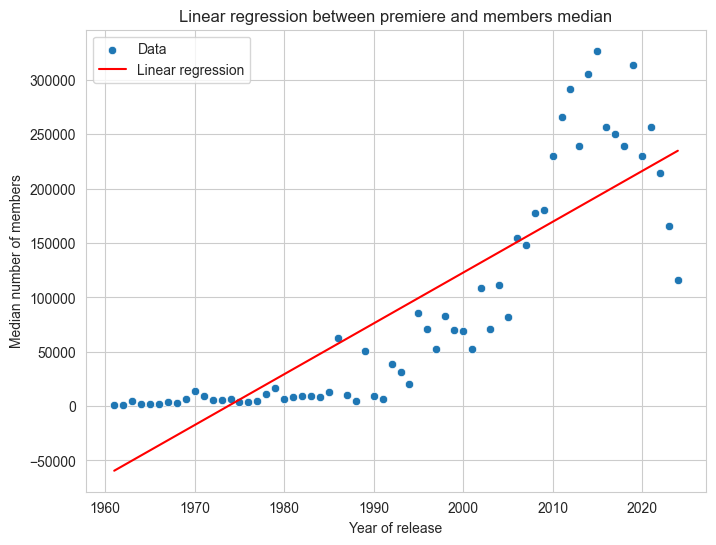

In [25]:
from scipy.stats import linregress

# Linear regression
slope, intercept, r_value, p_value, std_err = linregress(yearly_members.index, yearly_members.values)

# Draw chart
plt.figure(figsize=(8, 6))

# Draw charts (here, index stands for yearsa and values for the members median)
sns.scatterplot(x=yearly_members.index, y=yearly_members.values, label='Data')

# Draw regression
plt.plot(yearly_members.index, slope * yearly_members.index + intercept, color='red', label='Linear regression')


# Labels and title
plt.title('Linear regression between premiere and members median')
plt.xlabel('Year of release')
plt.ylabel('Median number of members')
plt.legend()

# Mostrar el gráfico
plt.show()


# <span style="color:#33a2ff" > Hypothesis 2: There are great difference in the median members amount depending on the design studio </span>

- Null Hypothesis (H₀): The average number of members presents no great differences between studios.

- Alternative Hypothesis (H₁): The average number of members presents great difference between studios.

In [26]:
groups = [group['members'].values for name, group in df.groupby('studios')]

# Perform ANOVA test
f_stat, p_value = stats.f_oneway(*groups)

# Statistics results
print(f"Statistic F: {f_stat}")
print(f"P-value: {p_value}")

# Print results
if p_value < 0.05:
    print("Null hypothesis refused: there are great differences among the members median by studio.")
else:
    print("Null hypothesis NOT refused: there are NOT great differences among the members median by studio")


Statistic F: 2.2628223926963176
P-value: 1.5411293695791248e-50
Null hypothesis refused: there are great differences among the members median by studio.


# <div style="color:#33a2ff; font-size:36px"> Treemap of members median by studio </div>

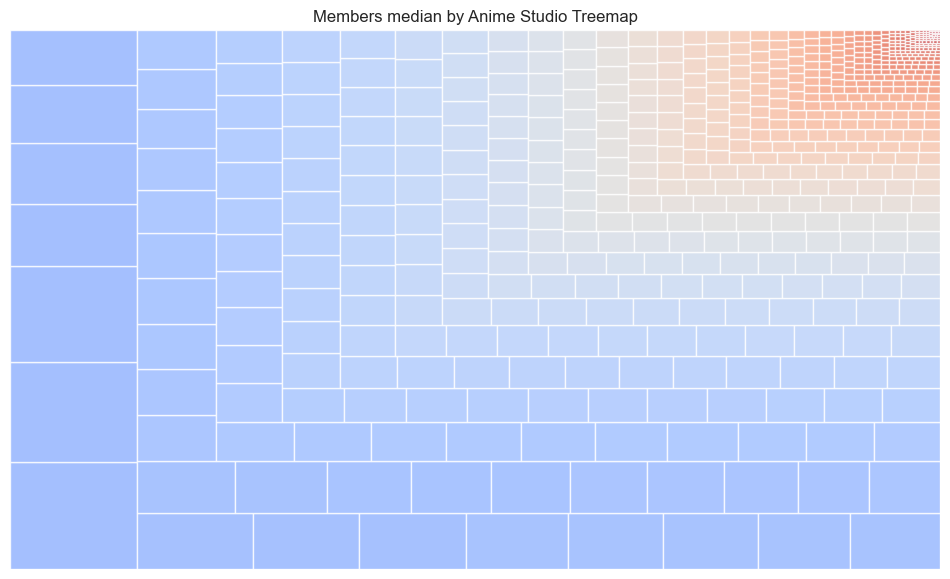

In [27]:
studio_members_mean = {name: group['members'].mean() for name, group in df.groupby('studios')}

studio_members_mean = dict(sorted(studio_members_mean.items(), key=lambda x: x[1], reverse=True))

# Get studio names a and values
studios = list(studio_members_mean.keys())
members_avg = list(studio_members_mean.values())

# Create  treemap
plt.figure(figsize=(12, 7))
colors = plt.cm.coolwarm(np.linspace(0.25, 1, len(studios)))  # Colores según la media de 'members'
squarify.plot(sizes=members_avg, color=colors, alpha=0.8)

# Visual enhance
plt.title("Members median by Anime Studio Treemap")
plt.axis('off')  # Ocultar ejes

# Show chart
plt.show()
